# **INTRODUCCION**

En el presente notebook se realiza la experimentacion con tres diferentes modelos de redes Neuronales para la clasificacion de movimiento, analizando los datos entregados por el acelerometro de un celular XIAOMI.


# **MARCO TEORICO**

## **Redes MPL**

Las redes neuronales MLP (Multilayer Perceptron) son un tipo de red neuronal artificial (RNA) ampliamente utilizada en el aprendizaje automático. Están compuestas por múltiples capas de neuronas artificiales interconectadas, organizadas en una estructura de alimentación a adelante.

Estructura de una red neuronal MLP:

* Capa de entrada: Recibe los datos de entrada, los cuales pueden ser imágenes, texto, números o cualquier otro tipo de información.
* Capas ocultas: Formada por una o más capas de neuronas artificiales. Cada neurona aplica una función de activación a la suma ponderada de sus entradas y produce una salida. Las capas ocultas permiten a la red aprender relaciones complejas entre los datos de entrada y la salida deseada.
* Capa de salida: Produce la predicción final de la red. El número de neuronas en la capa de salida depende del número de clases o valores de salida deseados.

Funcionamiento de las redes neuronales MLP:

* Entrada de datos: Los datos de entrada se introducen en la capa de entrada.
Propagación hacia adelante: La información fluye a través de la red, desde la capa de entrada hacia las capas ocultas y finalmente hacia la capa de salida. En cada capa, cada neurona calcula una salida aplicando una función de activación a la suma ponderada de sus entradas.
* Aprendizaje: La red se entrena utilizando un conjunto de datos de entrenamiento etiquetado. Durante el entrenamiento, la red ajusta los pesos de las conexiones entre las neuronas para minimizar el error entre sus predicciones y las salidas deseadas.
* Predicción: Una vez entrenada, la red se puede utilizar para hacer predicciones sobre nuevos datos no vistos durante el entrenamiento.


Aplicaciones de las redes neuronales MLP:

* Clasificación de imágenes: Reconocer objetos, rostros o escenas en imágenes.
* Reconocimiento de voz: Convertir el habla en texto.
* Análisis de texto: Clasificar documentos, identificar temas o extraer información.
* Predicción de series de tiempo: Pronosticar valores futuros en una serie de datos, como el precio de las acciones o el clima.
* Detección de anomalías: Identificar patrones inusuales en los datos.

## **Redes Convolucionales**


Las redes convolucionales (Redes Convolucionales Neuronales - CNN) son un tipo de red neuronal artificial (RNA) ampliamente utilizada en el procesamiento de imágenes y el análisis de señales.

A diferencia de las redes neuronales MLP (Multilayer Perceptron) que procesan los datos de forma global, las CNN se enfocan en procesar información localmente mediante operaciones de convolución.

--Arquitectura de una red convolucional:

* Capas convolucionales: Son el componente principal de las CNN. Cada capa convolucional aplica una operación de convolución a la entrada, utilizando un filtro convolucional o kernel. El filtro se desliza por la entrada, calculando la suma ponderada de los elementos en cada ventana local y produciendo una salida.
* Capas de agrupación (Pooling): Reducen la dimensión de la salida de las capas convolucionales, lo que ayuda a controlar la sobreestimación y a extraer características más abstractas.
* Capas totalmente conectadas: Al final de la red, se pueden utilizar capas totalmente conectadas para realizar tareas de clasificación o regresión.

#**PROBLEMATICA**

La problematica que tienen la empresa xyz es que quiere crear un sistema que dependiendo el movimiento que realice el usaurio con su dispositivo movil, le indique que tipo de movimiento realiza entre ellos puede ser caminar, correr, bajar las escaleras, etc.

Para solucionar este problema se decide utilizar un modelo de inteligencia artificial que estara implementado en los dispositivos de los usuarios, para poder entrenar este modelo se decidio capturar la informacion entregada por un acelerometro de los diferentes tipos de movimientos en la plataforma edge impulse. 

Para el proceso de entrenamiento se decide experimentar con tres diferentes tipos de arquitectura (MLP, Convolucionales y Redes Recurrentes).

#**SOLUCION**


In [1]:
#Referencias
from matplotlib import pyplot
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras.preprocessing.sequence import pad_sequences
import ujson
from pathlib import Path
import numpy as np

In [2]:

# Se especifica el path del directorio que tiene los archivos json con los datos de los acelerometros capturados en edge impulse
DATASET_PATH = "..\data\Acelerometro"
data_directory = Path(DATASET_PATH)

# Se obtienen los archivos json del directorio
json_files = list(data_directory.glob('*.json'))
X = []
Y = []

# Se leen los archivos json y se obtienen los valores de los acelerometros y las etiquetas
for filename in json_files:
    with open(filename, 'r') as json_file:
        data = ujson.load(json_file)
        X.append(data['payload']['values'])
        label = filename.name.split('.')[0]
        Y.append(label)
        
X = pad_sequences(X, padding='post', dtype='float32')
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)
print(X)
print(Y)


(61, 94, 3)
(61,)
[[[-5.8  3.6 10. ]
  [-7.8  3.8 12.5]
  [-7.9  3.9 12.3]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-3.9  4.2  9.2]
  [-4.4  4.5  9.9]
  [-5.8  4.9 13. ]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-3.2  1.1  5.6]
  [-3.4  0.8  6.2]
  [-3.9  1.3  6.2]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 ...

 [[-2.5 13.6 12.4]
  [-3.4 10.9 10.4]
  [-3.1  9.6  9.1]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-0.3  2.2  3.4]
  [ 0.5  2.1  1.3]
  [ 1.6  2.  -1.2]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-6.9 11.3 22.1]
  [-6.4 10.9 20.7]
  [-5.1 10.  17.6]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]]
['bajar escaleras' 'bajar escaleras' 'bajar escaleras' 'bajar escaleras'
 'bajar escaleras' 'bajar escaleras' 'bajar escaleras' 'bajar escaleras'
 'bajar escaleras' 'bajar escaleras' 'bajar escaleras' 'bajar escaleras'
 'caminar' 'caminar' 'cam

In [3]:
Y = LabelEncoder().fit_transform(Y)
Y = keras.utils.to_categorical(Y)

In [4]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42, 94, 3)
(42, 5)
(19, 94, 3)
(19, 5)


In [6]:
print(X_train)

[[[-3.6  5.4  2.7]
  [-5.6  6.6  3.3]
  [-6.   6.7  3.5]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-1.5  9.8 17. ]
  [-2.4  9.3 13.5]
  [-2.8  8.3 10.5]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[-7.3  4.3  5.9]
  [-7.5  2.5  4.8]
  [-8.2  1.5  3.3]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 ...

 [[ 0.9 -1.1  2.5]
  [ 0.8 -1.   2. ]
  [ 1.3 -0.7  0.5]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[ 0.2  4.2  3.5]
  [ 0.3  4.3  3.6]
  [ 0.4  4.5  4.2]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]

 [[ 0.4  3.3  4.3]
  [ 0.6  3.3  5.1]
  [ 0.2  3.6  5.3]
  ...
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]
  [ 0.   0.   0. ]]]


In [7]:
# Se realiza un aplanado de los datos para que puedan ser procesados por la red neuronal
X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))

**Modelo MLP

In [8]:
from keras.layers import *  
from keras.models import Sequential
# Determinar la forma de entrada y el número de clases
input_shape = X_train.shape[1]
num_classes = y_train.shape[1] if len(y_train.shape) > 1 else np.max(y_train) + 1

# Crear el modelo
model = Sequential()
model.add(Input(shape=(X_train_flattened.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3209 - loss: 3.1336
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4107 - loss: 1.5718 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5526 - loss: 1.3654 
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6687 - loss: 1.0715 
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8527 - loss: 0.5215 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9474 - loss: 0.3040  
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9578 - loss: 0.2324 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9474 - loss: 0.2103 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.1187 
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0632 


In [9]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test_flattened, y_test)
print('Precisión en el conjunto de prueba:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step - accuracy: 0.8947 - loss: 0.4575
Precisión en el conjunto de prueba: 0.8947368264198303


In [10]:
y_pred_rf = model.predict(X_test_flattened)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


In [11]:
y_predreport=np.argmax(y_pred_rf, axis=1)
y_tes=np.argmax(y_test, axis=1)
print(classification_report(y_tes, y_predreport))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3

    accuracy                           0.89        19
   macro avg       0.90      0.89      0.87        19
weighted avg       0.95      0.89      0.90        19



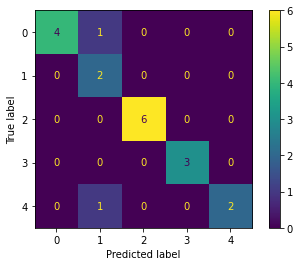

In [12]:
# Se obtiene la matriz de confusión
cm = confusion_matrix(y_tes, y_predreport)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pyplot.show()

** Modelo Convolucional 1D

In [13]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Determinar la forma de entrada y el número de clases
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1] if len(y_train.shape) > 1 else np.max(y_train) + 1
print(input_shape)

# Crear el modelo
model = Sequential()
model.add(Input(shape=(input_shape)))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10)

(94, 3)
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1106 - loss: 2.1026
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4896 - loss: 1.2540 
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8368 - loss: 0.7939
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9474 - loss: 0.5849
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9737 - loss: 0.4224 
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.2645
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.1813 
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.1134 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0726
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0473


In [14]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.20565469563007355
Test Accuracy: 0.8947368264198303


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      1.00      0.80         2
           2       0.86      1.00      0.92         6
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3

    accuracy                           0.89        19
   macro avg       0.90      0.87      0.86        19
weighted avg       0.92      0.89      0.89        19



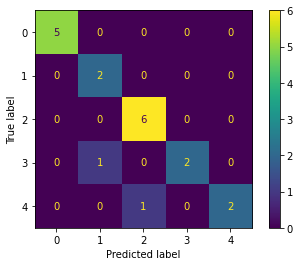

In [15]:
# Obtener las predicciones de clase
y_pred_rf = model.predict(X_test)
y_predreport=np.argmax(y_pred_rf, axis=1)
y_tes=np.argmax(y_test, axis=1)
print(classification_report(y_tes, y_predreport))

# Se obtiene la matriz de confusión
cm = confusion_matrix(y_tes, y_predreport)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pyplot.show()

** Modelo Redes Recurrentes

In [16]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Determinar la forma de entrada y el número de clases
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1] if len(y_train.shape) > 1 else np.max(y_train) + 1

# Crear el modelo
model = Sequential()
model.add(Input(shape=(input_shape)))
model.add(SimpleRNN(50, return_sequences=True))
model.add(SimpleRNN(50))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1949 - loss: 1.7133
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3735 - loss: 1.4809
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4370 - loss: 1.3671
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4792 - loss: 1.2931
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5422 - loss: 1.1947
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5739 - loss: 1.1310
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6632 - loss: 1.0185 
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6528 - loss: 0.9525
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7421 - loss: 0.8699
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7579 - loss: 0.8019
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8368 - loss: 0.7494
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8631 - loss: 0.6693


In [17]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.8565571308135986
Test Accuracy: 0.6315789222717285


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         6
           3       0.67      0.67      0.67         3
           4       0.40      0.67      0.50         3

    accuracy                           0.63        19
   macro avg       0.51      0.67      0.57        19
weighted avg       0.54      0.63      0.57        19



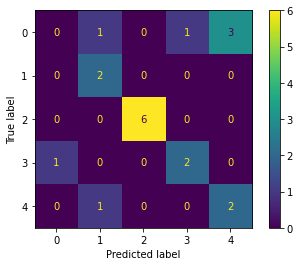

In [18]:
# Obtener las predicciones de clase
y_pred_rf = model.predict(X_test)
y_predreport=np.argmax(y_pred_rf, axis=1)
y_tes=np.argmax(y_test, axis=1)
print(classification_report(y_tes, y_predreport))

# Se obtiene la matriz de confusión
cm = confusion_matrix(y_tes, y_predreport)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pyplot.show()

In [19]:
model = Sequential()
model.add(Input(shape=(input_shape)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.2475 - loss: 1.5952
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3790 - loss: 1.5509
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.3686 - loss: 1.5137
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3894 - loss: 1.4844
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3998 - loss: 1.4331
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4261 - loss: 1.3943
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4315 - loss: 1.3641
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4578 - loss: 1.3395
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.4737 - loss: 1.3005
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4896 - loss: 1.2582
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5050 - loss: 1.1888
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5104 - loss: 1.1512


In [20]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.4612671136856079
Test Accuracy: 0.9473684430122375


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 975ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         3
           4       0.75      1.00      0.86         3

    accuracy                           0.95        19
   macro avg       0.95      0.97      0.95        19
weighted avg       0.96      0.95      0.95        19



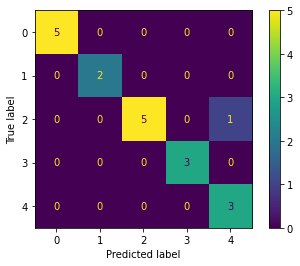

In [21]:
# Obtener las predicciones de clase
y_pred_rf = model.predict(X_test)
y_predreport=np.argmax(y_pred_rf, axis=1)
y_tes=np.argmax(y_test, axis=1)
print(classification_report(y_tes, y_predreport))

# Se obtiene la matriz de confusión
cm = confusion_matrix(y_tes, y_predreport)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pyplot.show()

#**CONCLUSIONES**

* El modelo MPL se pudo observar que tiene un acuracy de 0.84 pero se ve que no tiene un buen desempeño para los datos con categoria 1.
* Para el modelo convolucional 1D se nota un mejor comportamiento porque en el classification_reporte se puede ver que tiene un buen porcentaje para todas las categorias.
* Para las redes recurrentes se puede observar que al utilizar la red tipo LSTM esta presenta mejores resultados que el experimiento con una RNN simple pero aunque tiene valores similares a la red convolucional, la red convolucional sigue teniendo mejores resultados.

*************************************************************Detenccion de Voz ***********************************************************************************************

#**INTRODUCCION**

En la siguiente seccion del notebook se va realizar experimentos de dos modelos de redes neuronales para la clasificacion de audio, lo primero que se realiza es la transformacion de los audios a matrices para el entranamiento y validacion de los diferentes modelos.

#**PROBLEMATICA**

La empresa XYZ desea implementar un modelo que dependiendo el audio que ingrese el usuario se clasifique para poder realizar diferentes acciones dependiendo de dicha clasificacion.

#**SOLUCION**

In [22]:
# Se crea una función que cargo los archivos de audio y genera un vector en 
# numpy con las muestras del mismo
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
   # sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
   # wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [23]:
# Se define una función que con las muestras del archivo de audio, genera el 
# espectograma
def preprocess(wave): 
    #wav = wave[:32000]
    wav = wave[:16000]
    #zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
   # wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    return spectrogram

In [24]:
# Se especifica el path del directorio que tiene los archivos json con los datos de los acelerometros capturados en edge impulse
AUDIOS_PATH = "..\data\Audios"
audios_directory = Path(AUDIOS_PATH)

# Se obtienen los archivos json del directorio
audios = list(audios_directory.glob('*.wav'))
X = []
Y = []

for filename in audios:
    data = load_wav_16k_mono(str(filename))
    data = preprocess(data)
    X.append(data)
    label = filename.name.split('.')[0]
    Y.append(label)


In [25]:
X = pad_sequences(X, padding='post')
X = np.array(X)
Y = np.array(Y)

In [26]:
print(X.shape)
print(Y.shape)

(69, 124, 129)
(69,)


In [27]:
Y = LabelEncoder().fit_transform(Y)
Y = keras.utils.to_categorical(Y)

In [28]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [29]:
Xtrain_tensor=tf.expand_dims(X_train, axis=3)
X_test_tensor=tf.expand_dims(X_test, axis=3)

In [30]:
print(y_train.shape)

(48, 5)


In [31]:
# Se crea el modelo secuencial en Keras con capas convolucionales 2D
# y una capa clasificador densa tipo softmax
modelo = keras.models.Sequential()
modelo.add(keras.layers.InputLayer(shape=(Xtrain_tensor.shape[1:])))
modelo.add(keras.layers.Conv2D(8, 3, activation="relu",padding="same"))
modelo.add(keras.layers.Conv2D(16, 3, activation="relu",padding="same"))
modelo.add(keras.layers.Conv2D(32, 3, activation="relu",padding="same"))
modelo.add(keras.layers.Conv2D(64, 3, activation="relu",padding="same"))
modelo.add(keras.layers.MaxPooling2D(pool_size=2,strides=2, padding='same'))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(y_train.shape[1], activation = 'softmax'))
# Se muestra el resumen de la arquitectura del modelo
modelo.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 129, 8)    │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 129, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 129, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 124, 129, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 65, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 257920)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │     1,289,605 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,989 (5.01 MB)

 Trainable params: 1,313,989 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [32]:
# Se compila el modelo y entrena el modelo
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo.fit(Xtrain_tensor,y_train, epochs=10,batch_size=None)

Epoch 1/10


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1146 - loss: 1.7167   
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 878ms/step - accuracy: 0.4757 - loss: 1.0945
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 600ms/step - accuracy: 0.7951 - loss: 0.8859
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 742ms/step - accuracy: 0.8993 - loss: 0.6956
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9375 - loss: 0.4397
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 555ms/step - accuracy: 1.0000 - loss: 0.1926
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 571ms/step - accuracy: 0.9757 - loss: 0.1013
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 581ms/step - accuracy: 0.9757 - loss: 0.0521
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 639ms/step - accuracy: 1.0000 - loss: 0.0085
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 596ms/step - accuracy: 1.0000 - loss: 0.0034


In [33]:
# Se evalua el modelo con los datos de testeo
modelo.evaluate(X_test_tensor, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step - accuracy: 0.5714 - loss: 3.0576


[3.0575971603393555, 0.5714285969734192]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


c:\Users\caoti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caoti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caoti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         2
           1       0.00      0.00      0.00         0
           2       0.75      0.38      0.50         8
           3       0.83      1.00      0.91         5
           4       1.00      0.33      0.50         6

    accuracy                           0.57        21
   macro avg       0.57      0.54      0.46        21
weighted avg       0.79      0.57      0.59        21



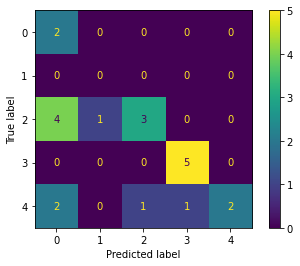

In [34]:
# Obtener las predicciones de clase
y_pred_rf = modelo.predict(X_test_tensor)
y_predreport=np.argmax(y_pred_rf, axis=1)
y_tes=np.argmax(y_test, axis=1)
print(classification_report(y_tes, y_predreport))

# Se obtiene la matriz de confusión
cm = confusion_matrix(y_tes, y_predreport)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pyplot.show()

In [35]:
print(X_train.shape)

(48, 124, 129)


In [36]:


modelo = keras.models.Sequential()
modelo.add(keras.layers.InputLayer(shape=(124, 129)))
modelo.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
modelo.add(tf.keras.layers.MaxPooling1D(pool_size=2))
modelo.add(tf.keras.layers.LSTM(64, return_sequences=True))
modelo.add(tf.keras.layers.LSTM(32))
modelo.add(keras.layers.Dense(y_train.shape[1], activation = 'softmax'))

# Compilar el modelo
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(X_train, y_train, epochs=10)

# Evaluar el modelo
modelo.evaluate(X_test, y_test)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.1806 - loss: 1.5702
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4653 - loss: 1.4512
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5799 - loss: 1.3662
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5868 - loss: 1.3153
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6285 - loss: 1.2797
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6424 - loss: 1.2424
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6771 - loss: 1.1693
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7083 - loss: 1.1229 
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6875 - loss: 1.0534
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6979 - loss: 0.9845
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step - accuracy: 0.3333 - loss: 1.4345


[1.4344629049301147, 0.3333333432674408]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
              precision    recall  f1-score   support

           0       0.17      1.00      0.29         2
           2       0.00      0.00      0.00         8
           3       0.62      1.00      0.77         5
           4       0.00      0.00      0.00         6

    accuracy                           0.33        21
   macro avg       0.20      0.50      0.26        21
weighted avg       0.16      0.33      0.21        21



c:\Users\caoti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caoti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\caoti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

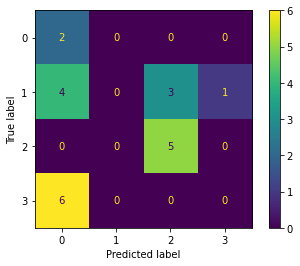

In [37]:
# Obtener las predicciones de clase
y_pred_rf = modelo.predict(X_test)
y_predreport=np.argmax(y_pred_rf, axis=1)
y_tes=np.argmax(y_test, axis=1)
print(classification_report(y_tes, y_predreport))

# Se obtiene la matriz de confusión
cm = confusion_matrix(y_tes, y_predreport)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
pyplot.show()

#**CONCLUSIONES**

* Los dos modelos no presentan un buen rendimiento y precision por lo cual se podria pensar que hay pocos datos para entrenamiento, tambien se puede ver que en ambos casos no pudo clasificar datos de la cuarta categoria por lo cual seria uno de los datos que se deberia atacar para poder mejorar el rendimiento.